## **211030_ADP 스터디 1주차_회귀, 통계분석(박영수)**

# **통계분석**






---



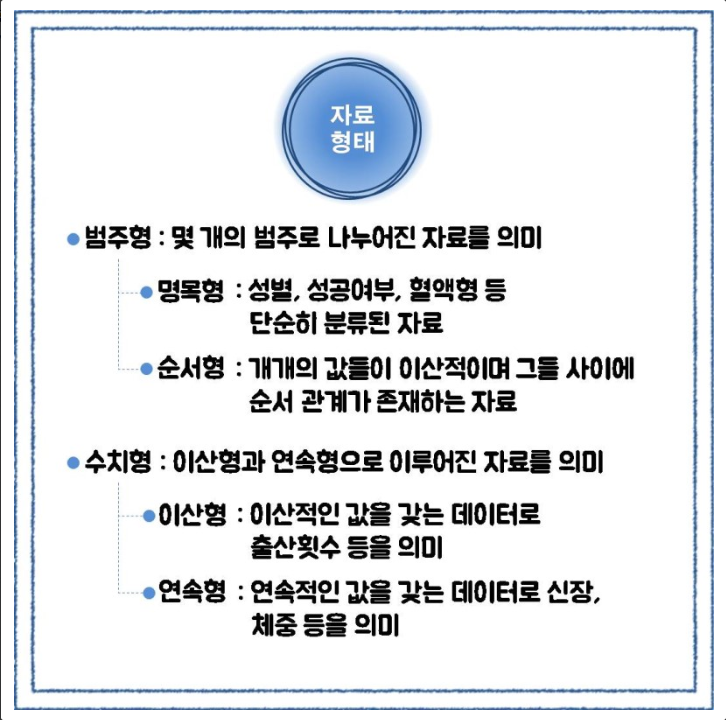



출처
https://horae.tistory.com/entry/%EB%B2%94%EC%A3%BC%ED%98%95%EC%88%98%EC%B9%98%ED%98%95%EC%9D%B4%EC%83%81%ED%98%95%EC%97%B0%EC%86%8D%ED%98%95%EB%AA%85%EB%AA%A9%ED%98%95%EC%88%9C%EC%84%9C%ED%98%95-%EC%A0%95%EB%A6%AC

## **1. t-test**

*   표준정규분포(평균0, 표준편차 1)와 같이 평균이 0을 중심으로 좌우가 동일한 분포를 따름
*   보통 모집단의 표준편차(σ)를 모름
     - 모집단의 표준편차 대신 표본의 표준편차 사용
     - 표본의 표준편차로 표준화 할 경우, 변환된 값은 표준정규분포가 아닌 t분포를 따름
*   데이터가 연속형일 경우 활용함
*   **두 집단의 평균이 동일**한지 알고자 할 때 검정통계량으로 활용함





### 1-1. 단일표본 t-test

- 표본집단의 평균과 모집단의 평균을 비교, 표본 집단의 평균으로 모집단의 평균을 설명할 수 있는지 검증하는 방법

1.   실습
- 전체 모평균이 25이고 표본 20개를 추출하여 표본의 평균이 전체 모평균을 설명하고 유의미한지 검증
- H0(귀무가설) : 표본샘플(20개)을 통해 모평균이 25라는 것이 옳다는 것을 증명
- H1(대립가설) : 표본샘플(20개)을 통해 모평균이 25라는 것이 틀리다는 것을 증명
2.   실습 순서
- 데이터 정규분포인지 확인 (Shapiro-Wilks Normality test 사용)
- t-test 진행


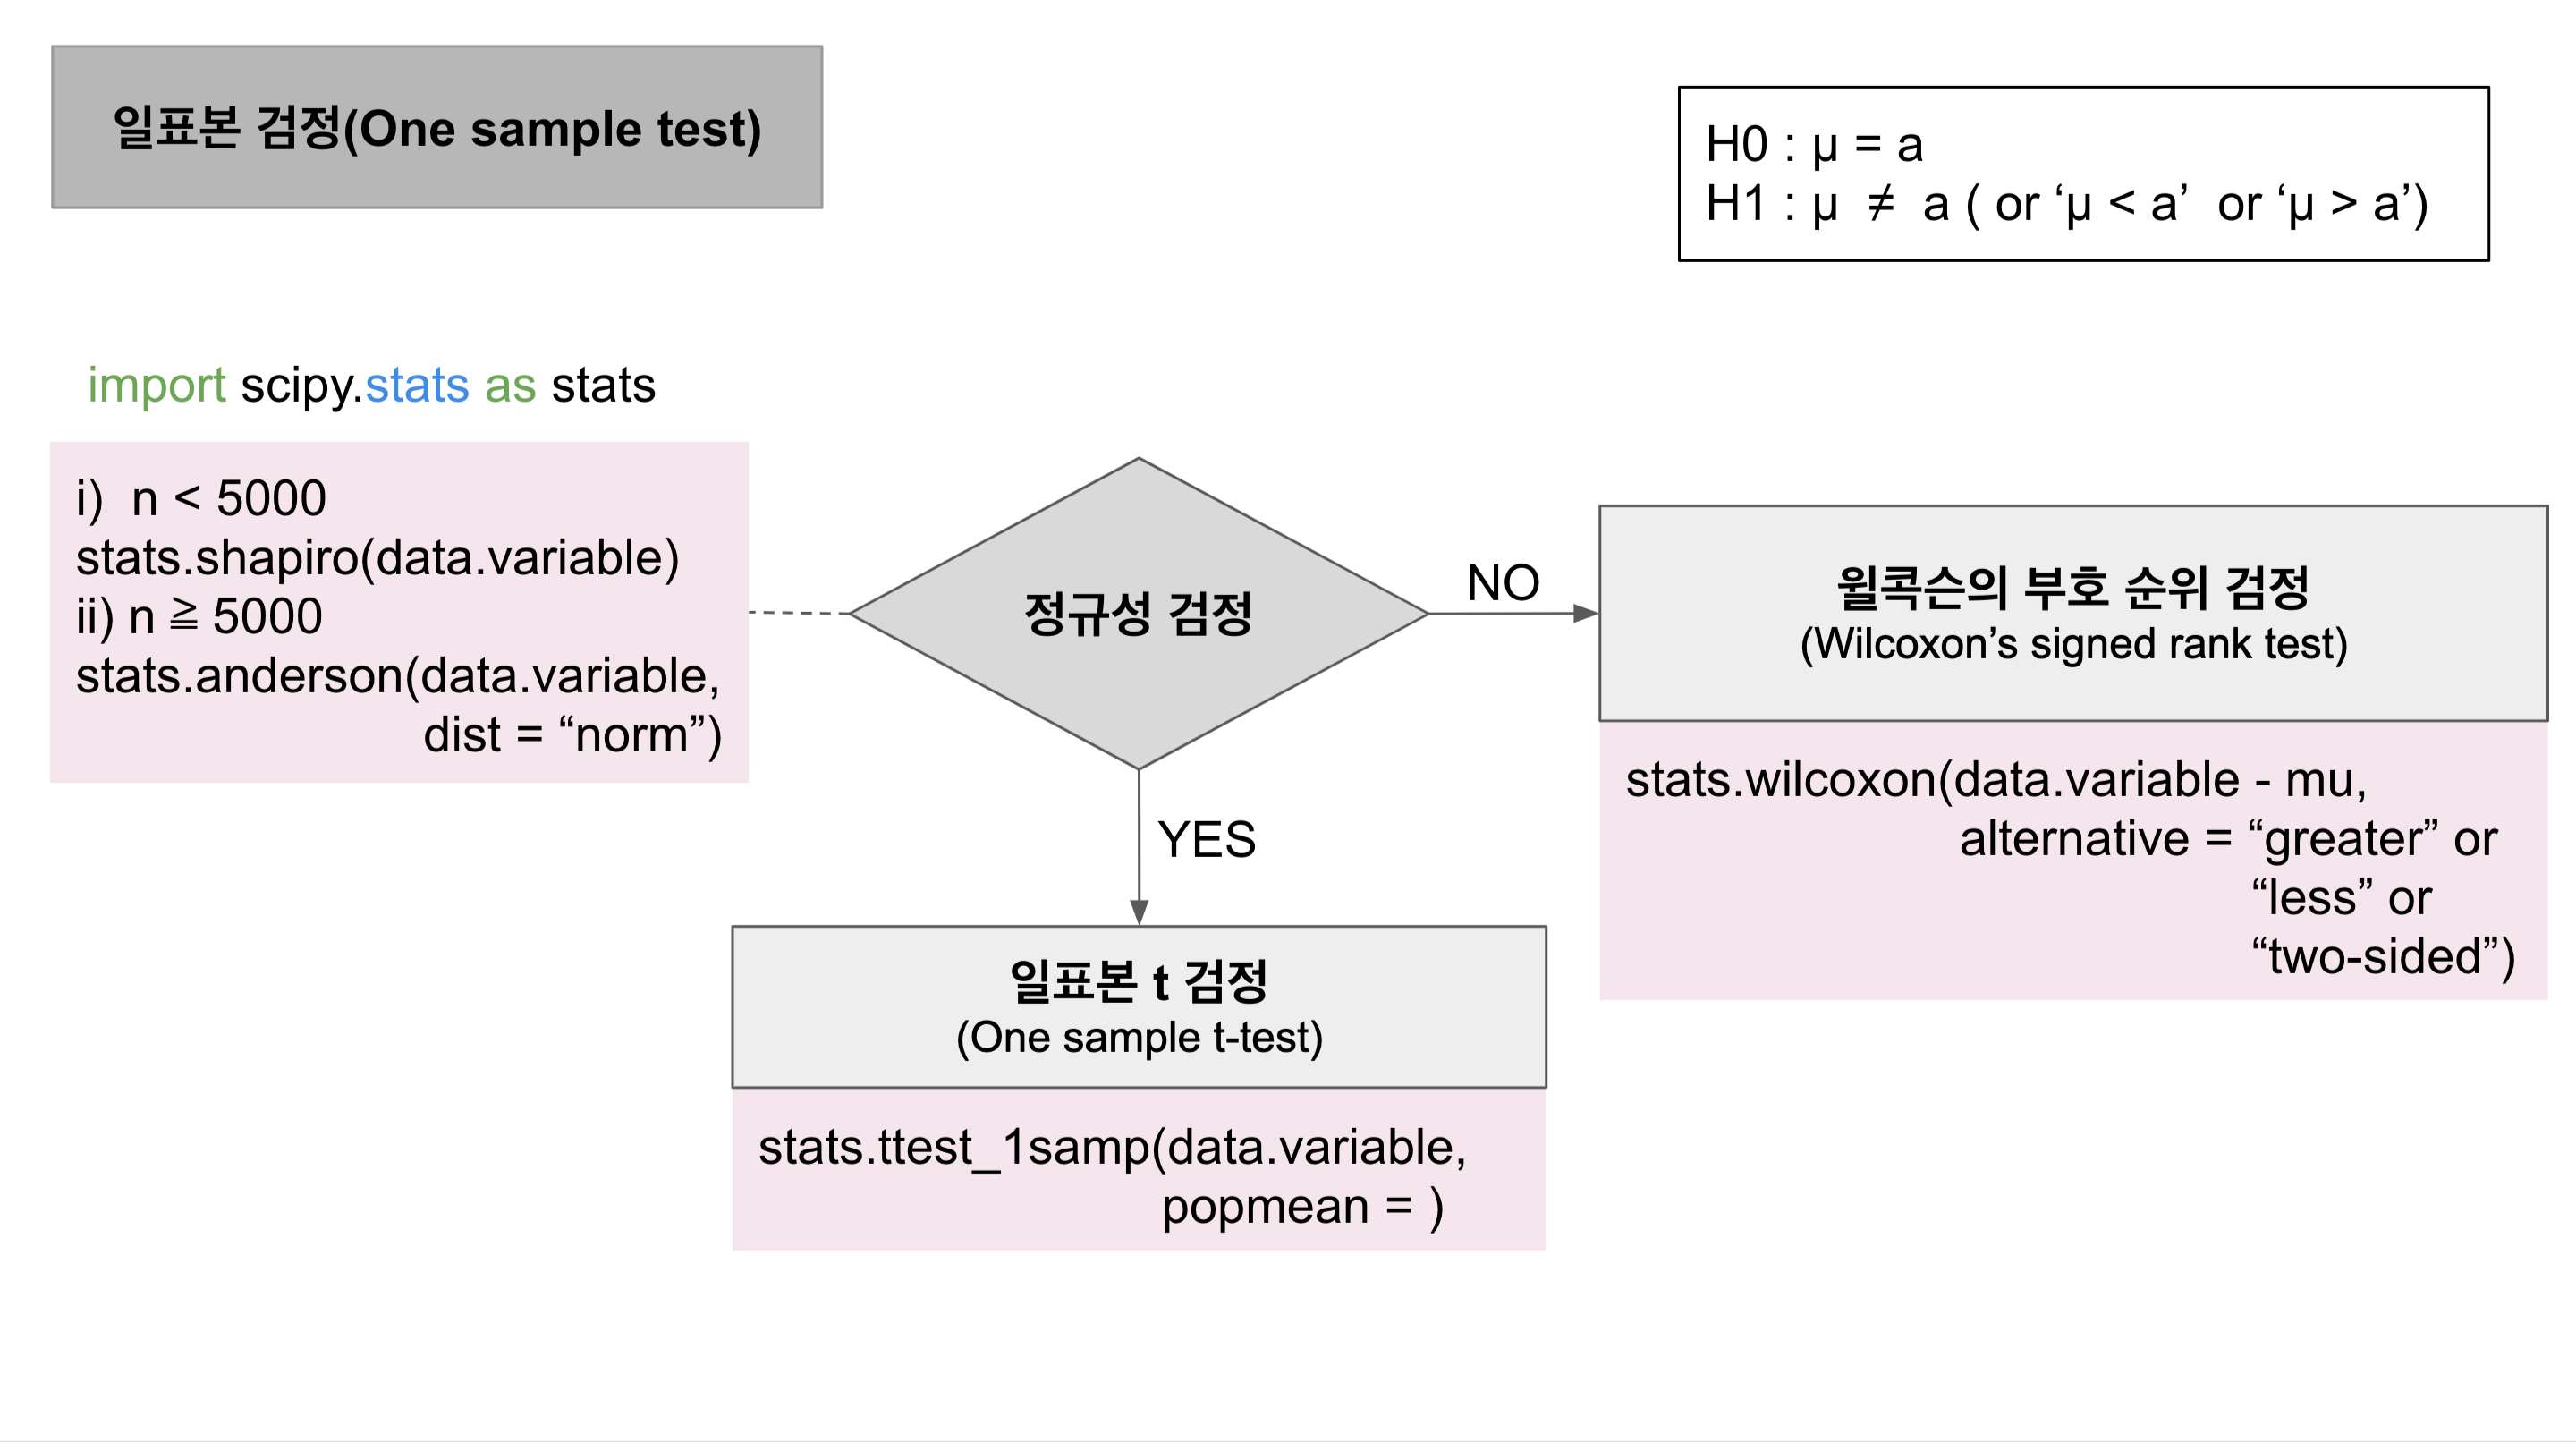

In [1]:
from scipy import stats 

#20개 data
data = [35,40,12,15,21,14,46,10,28,48,16,30,32,48,31,22,12,39,19,25]
#모평균 = 25
mu = 25 

#정규성 검증 (Shapiro-Wilks Normality test) 
stats.shapiro(data) 
print('Shapiro-Wilks Normality test')
print('검정통계량 W:',stats.shapiro(data)[0],'p-value:',stats.shapiro(data)[1])

print('-------------------------------------------------------------------------')

#one sample t-test
result = stats.ttest_1samp(data, mu) 
print(result)

#출처: https://techbrad.tistory.com/4 [Techbrad]

Shapiro-Wilks Normality test
검정통계량 W: 0.9335052371025085 p-value: 0.1803210973739624
-------------------------------------------------------------------------
Ttest_1sampResult(statistic=0.7687155636314738, pvalue=0.4515123595472501)


3. 결과 해석
- Shapiro-Wilks Normality test : p-value가 0.05보다 크므로 정규성 만족
- one sample t-test : p-value가 0.05보다 크므로 귀무가설 성립

출처 
1. https://mindscale.kr/course/basic-stat-python/15/
2. https://techbrad.tistory.com/4



---



## 1-2. 독립표본 t-test

*   두 독립표본의 평균을 통계적으로 비교하는 기법
*   두 표본집단을 구성 할 때 독립이면 독립표본
     - 독립표본 : 무작위로 남자 100명과 여자 100명을 뽑아 두 집단을 비교
     - 대응표본 : 부부 100쌍을 뽑아 남편 100명과 아내 100명의 두 집단을 비교

1.   실습
- 흡연자 10명, 비흡연자 10명 두 집단의 단기 기억력 비교
- H0(귀무가설) : 흡연자와 비흡연자의 단기 기억력은 같다
- H1(대립가설) : 흡연자와 비흡연자의 단기 기억력은 다르다
2.   실습 순서
- 각 데이터 정규분포인지 확인 (Shapiro-Wilks Normality test 사용)
- 각 데이터 등분산성 만족하는지 확인(levene test, bartlett test)
- t-test 진행








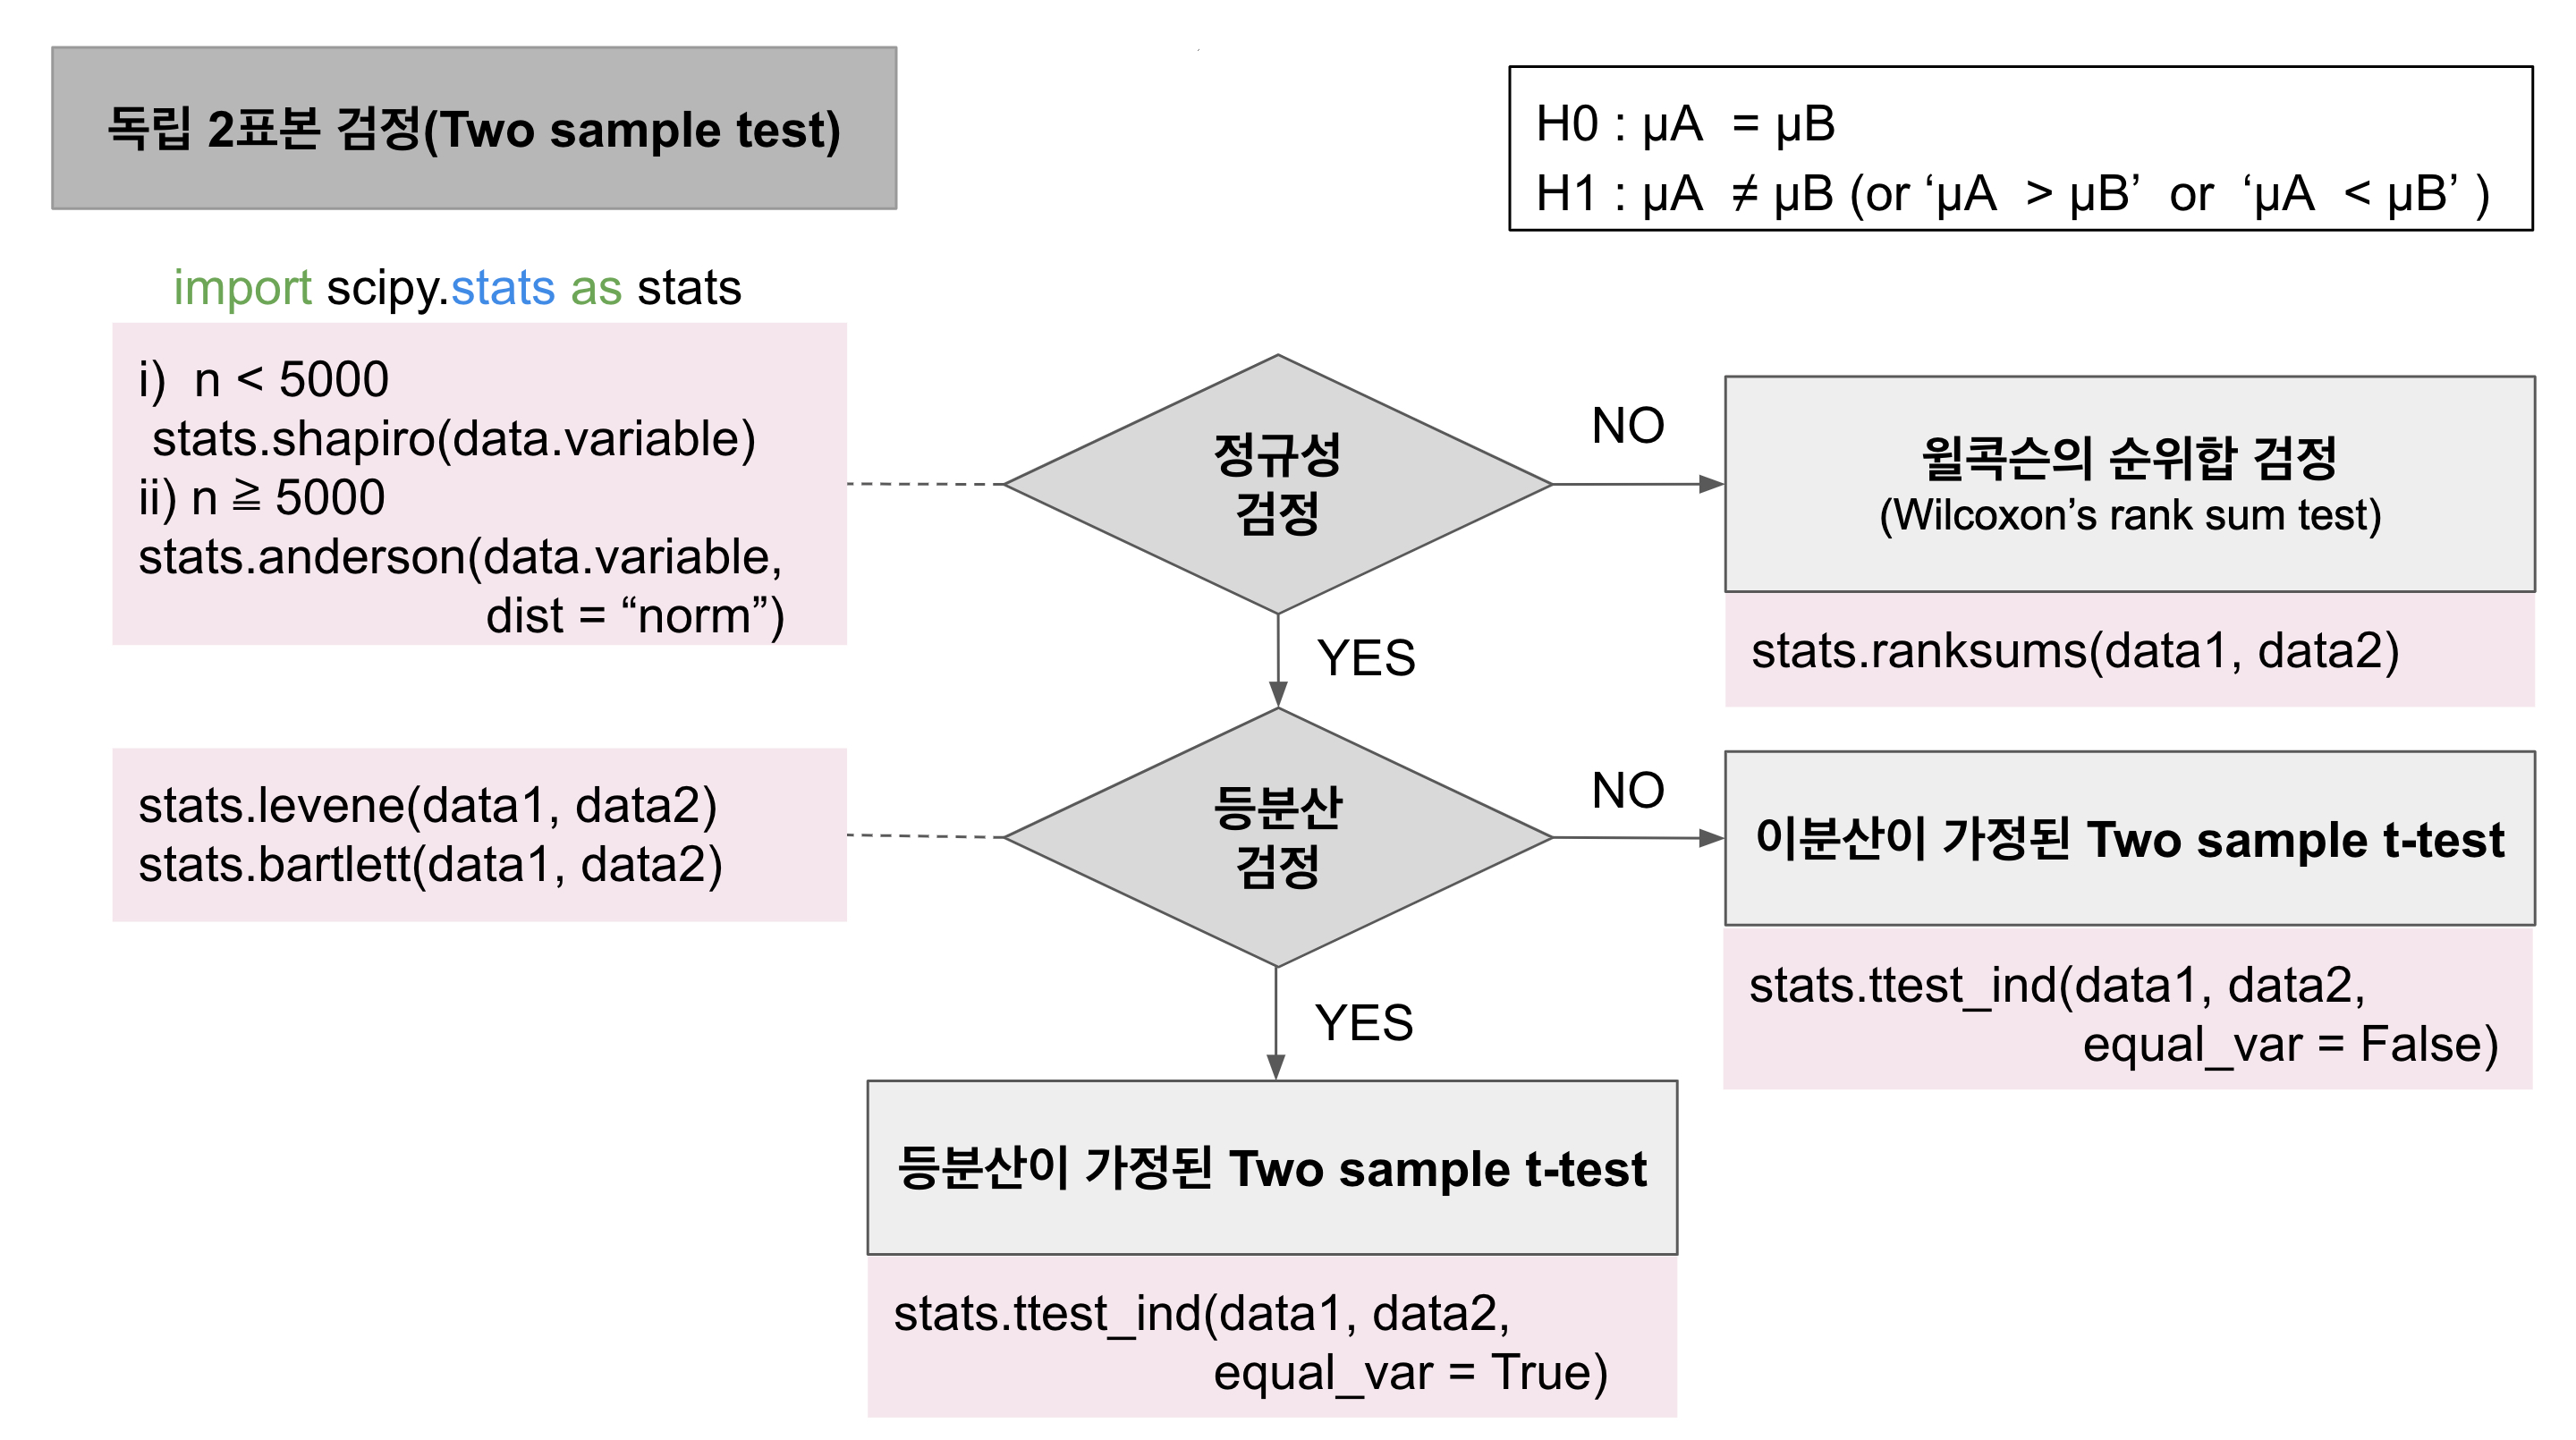

In [ ]:
from scipy import stats 
nonsmokers = [18, 22, 21, 17, 20, 17, 23, 20, 22, 21]
smokers = [16, 20, 14, 21, 20, 18, 13, 15, 17, 21] 

# 정규성 검정 (Shapiro-Wilk normality test) 
normal1 = stats.shapiro(nonsmokers) 
normal2 = stats.shapiro(smokers) 
print('검정통계량 W:',normal1[0],'p-value:',normal1[1])
print('검정통계량 W:',normal2[0],'p-value:',normal2[1])

# 정규성 따르지 않을 때(Wilcoxon's signed rank test)
wilcoxon = stats.wilcoxon(nonsmokers, smokers, zero_method = 'wilcox', alternative = 'greater')
print(wilcoxon)

# 등분산성 검정 (levene test) 
levene = stats.levene(nonsmokers, smokers) 
print(levene) 

# 등분산성 검정 (bartlett test) 
bartlett = stats.bartlett(nonsmokers, smokers) 
print(bartlett) 

# 등분산성 검정 (fligner test) 
fligner = stats.fligner(nonsmokers, smokers) 
print(fligner) 

# 등분산 아닐 경우
result1 = stats.ttest_ind(nonsmokers, smokers, equal_var=False)
print(result1)

# 독립표본 t-test
result2 = stats.ttest_ind(nonsmokers, smokers, equal_var=True)
print(result2)

#출처: https://techbrad.tistory.com/5 [Techbrad]

3. 결과 해석
- 정규성   : p-value가 0.05보다 크므로 정규성 만족
- 등분산성 : p-value가 0.05보다 크므로 정규성 만족
- 독립표본 t-test : p-value가 0.05보다 작으므로 귀무가설 기각, 대립가설 채택

출처
1. https://alex-blog.tistory.com/11
2. https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=y4769&logNo=220094867804



---



### 1-3. 대응표본 t-test

*   두 대응표본의 평균을 통계적으로 비교하는 기법
*   두 표본집단을 쌍으로 묶을 수 있을 때 대응표본이라 함
     - 독립표본 : 무작위로 남자 100명과 여자 100명을 뽑아 두 집단을 비교
     - 대응표본 : 부부 100쌍을 뽑아 남편 100명과 아내 100명의 두 집단을 비교

1.   실습
- 10명의 사격자가 1차, 2차 사격 했을 때 각 차수의 평균 비교
- H0(귀무가설) : 1차와 2차 사격의 평균은 같다
- H1(대립가설) : 1차와 2차 사격의 평균은 다르다
2.   실습 순서
- 각 데이터 정규분포인지 확인 (Shapiro-Wilks Normality test 사용)
- 각 데이터 등분산성 만족하는지 확인(levene test, bartlett test)
- t-test 진행








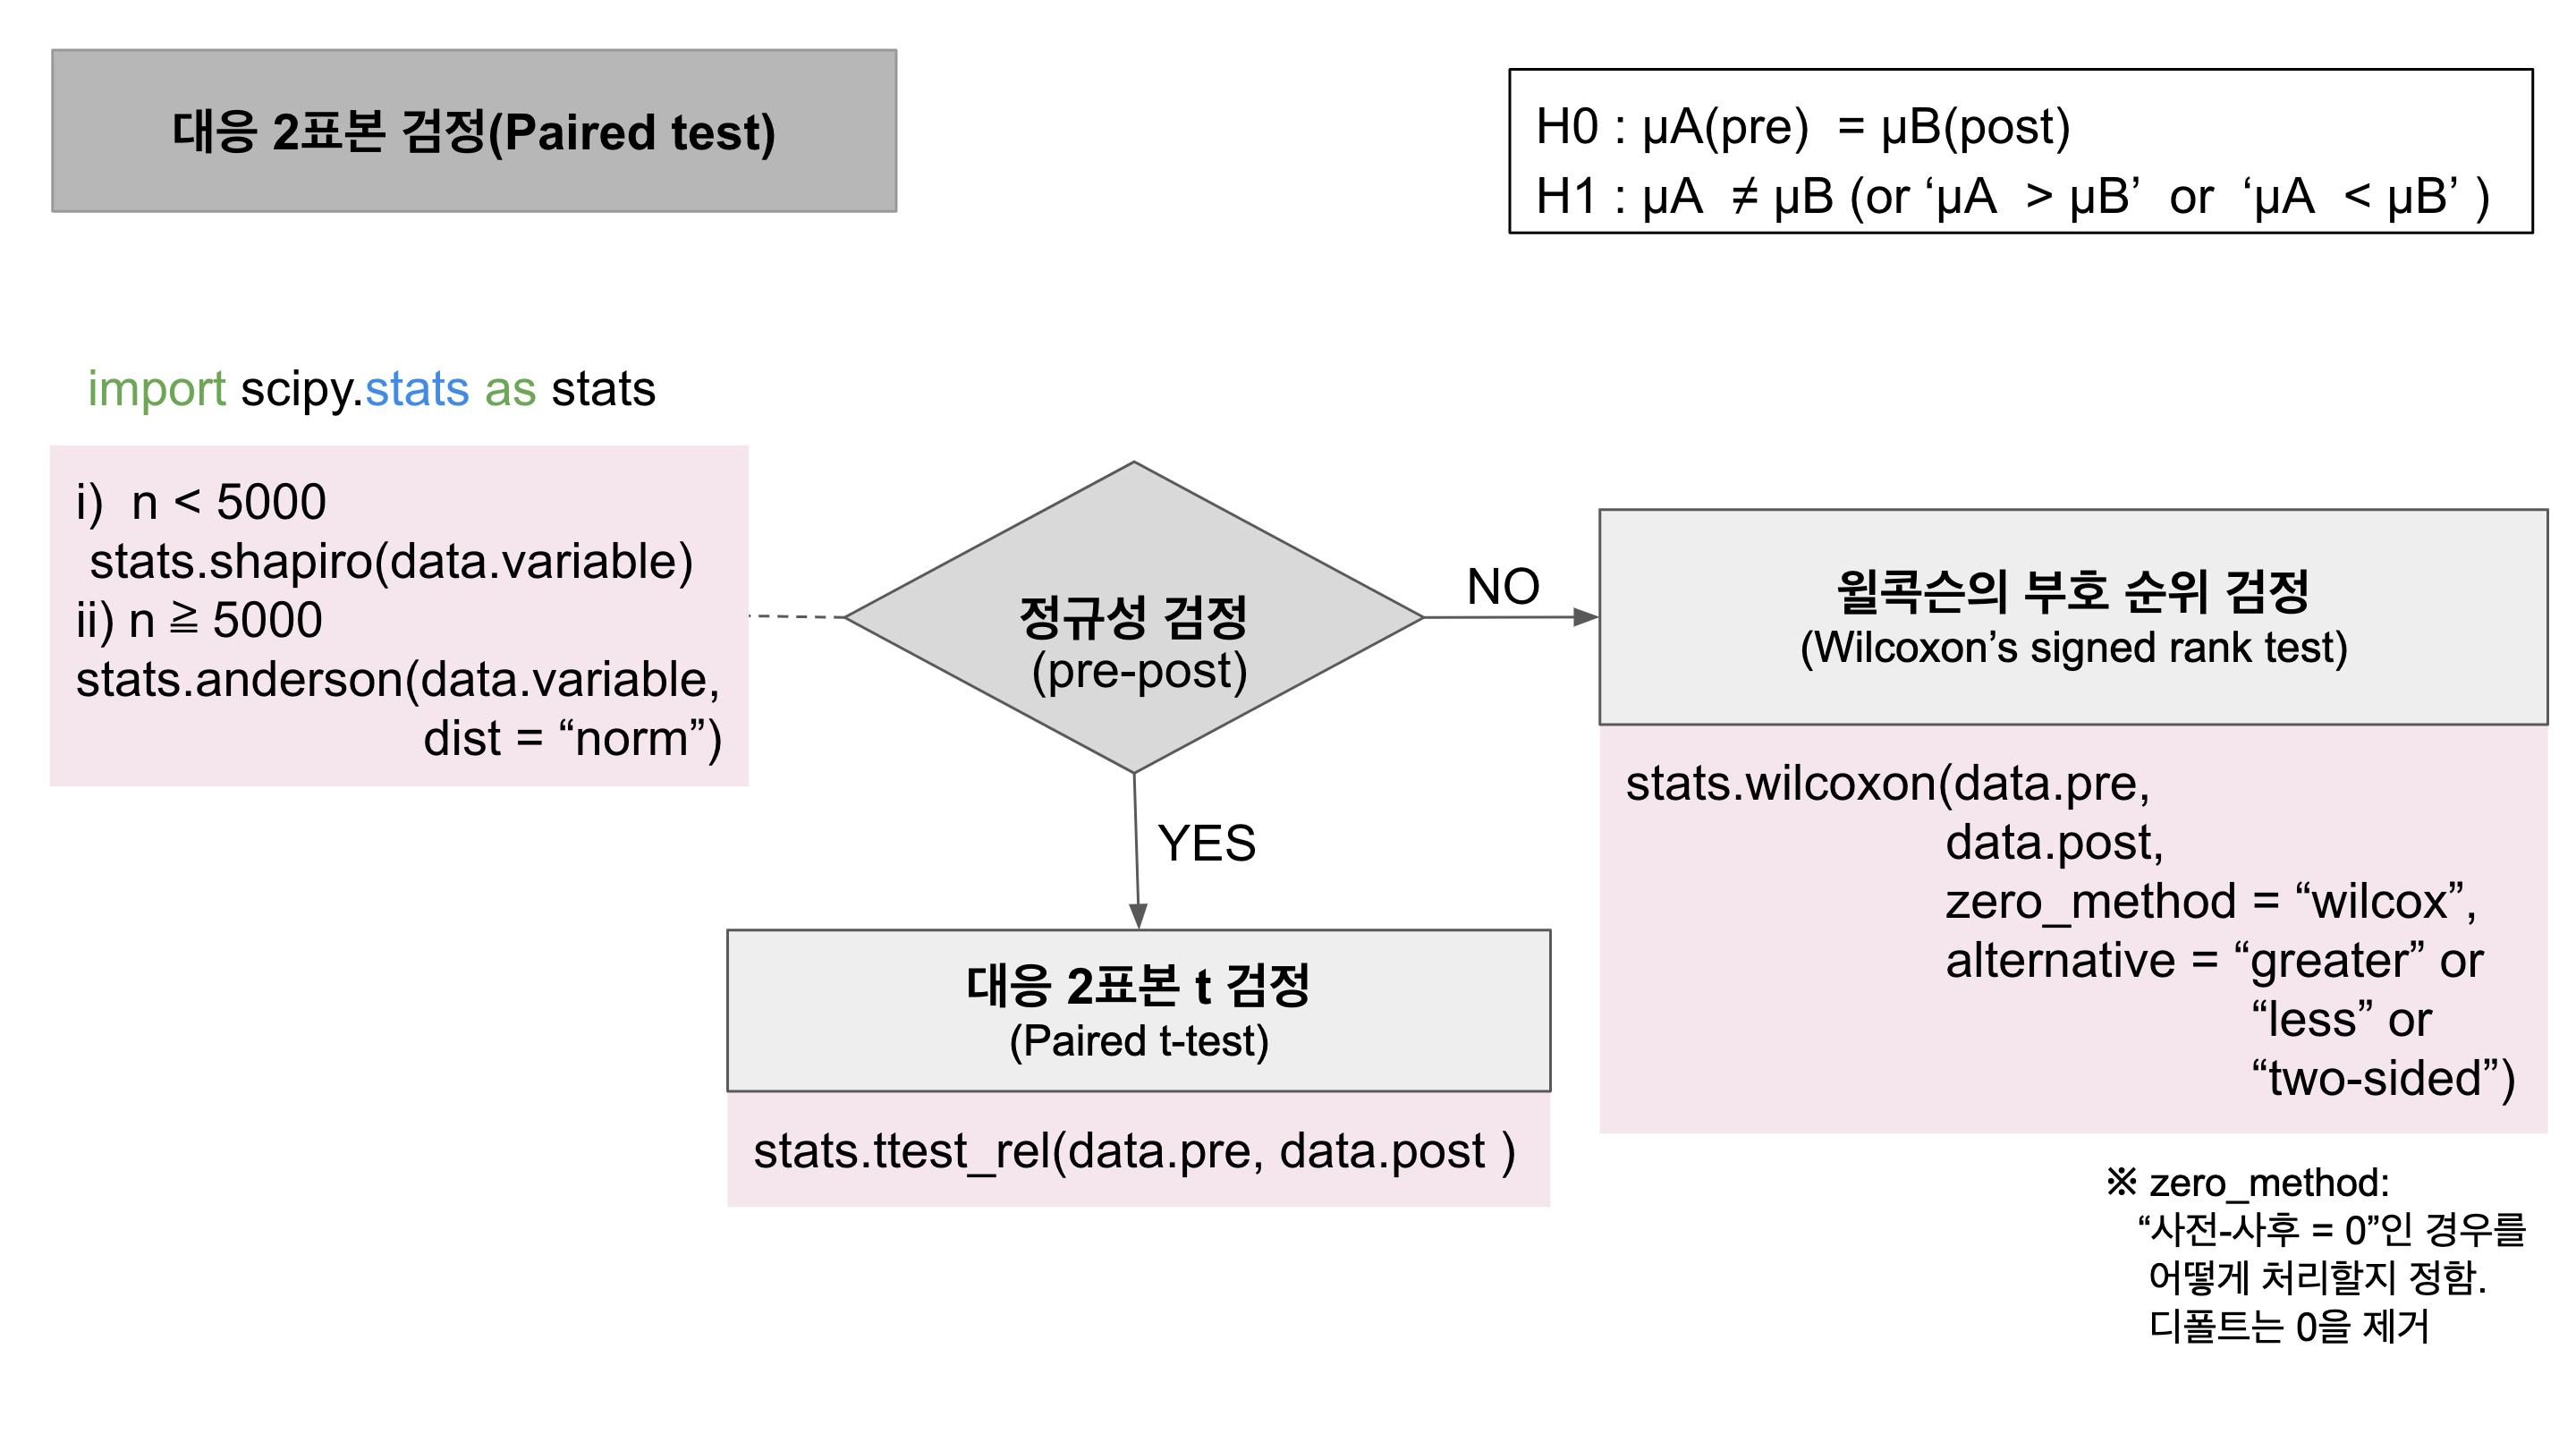

In [ ]:
from scipy import stats 
f_round = [0.430,0.266,0.567,0.531,0.707,0.716,0.651,0.589,0.469,0.723] 
s_round = [0.415,0.238,0.390,0.410,0.605,0.609,0.632,0.523,0.411,0.612]

# 정규성 검정 (Shapiro-Wilk normality test) 
f_round = stats.shapiro(f_round) 
s_round = stats.shapiro(s_round) 
print('검정통계량 W:',f_round[0],'p-value:',f_round[1])
print('검정통계량 W:',s_round[0],'p-value:',s_round[1])

# 정규성 따르지 않을 때(Wilcoxon's signed rank test)
wilcoxon = stats.wilcoxon(f_round, s_round, zero_method = 'wilcox', alternative = 'greater')
print(wilcoxon)

# 등분산성 검정 (levene test) 
levene = stats.levene(f_round, s_round) 
print(levene) 

# 등분산성 검정 (bartlett test) 
bartlett = stats.bartlett(f_round, s_round) 
print(bartlett) 

# 등분산성 검정 (fligner test) 
fligner = stats.fligner(f_round, s_round) 
print(fligner) 

# 대응표본 t-test
result = stats.ttest_rel(f_round, s_round)
print(result)

# 출처: https://techbrad.tistory.com/6 [Techbrad]

3. 결과 해석
- 정규성   : p-value가 0.05보다 크므로 정규성 만족
- 정규성X(비모수적) : Wilcoxon / p-value 0.05보다 크므로 귀무가설 채택
- 등분산성 : p-value가 0.05보다 크므로 정규성 만족
- 독립표본 t-test : p-value가 0.05보다 크므로 귀무가설 채택

출처
1. https://alex-blog.tistory.com/11
2. https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=y4769&logNo=220094867804



---



## **2. ANOVA**
분산분석, 변량분석
3개 이상의 집단에서 '평균'의 차이가 유의미한지를 보는 test
집단 간 분산과 집단 내 분산을 이용하여 각 집단별 평균에 대한 유의성 확인
정규성, 등분산성, 독립성 조건이 만족되어야 함

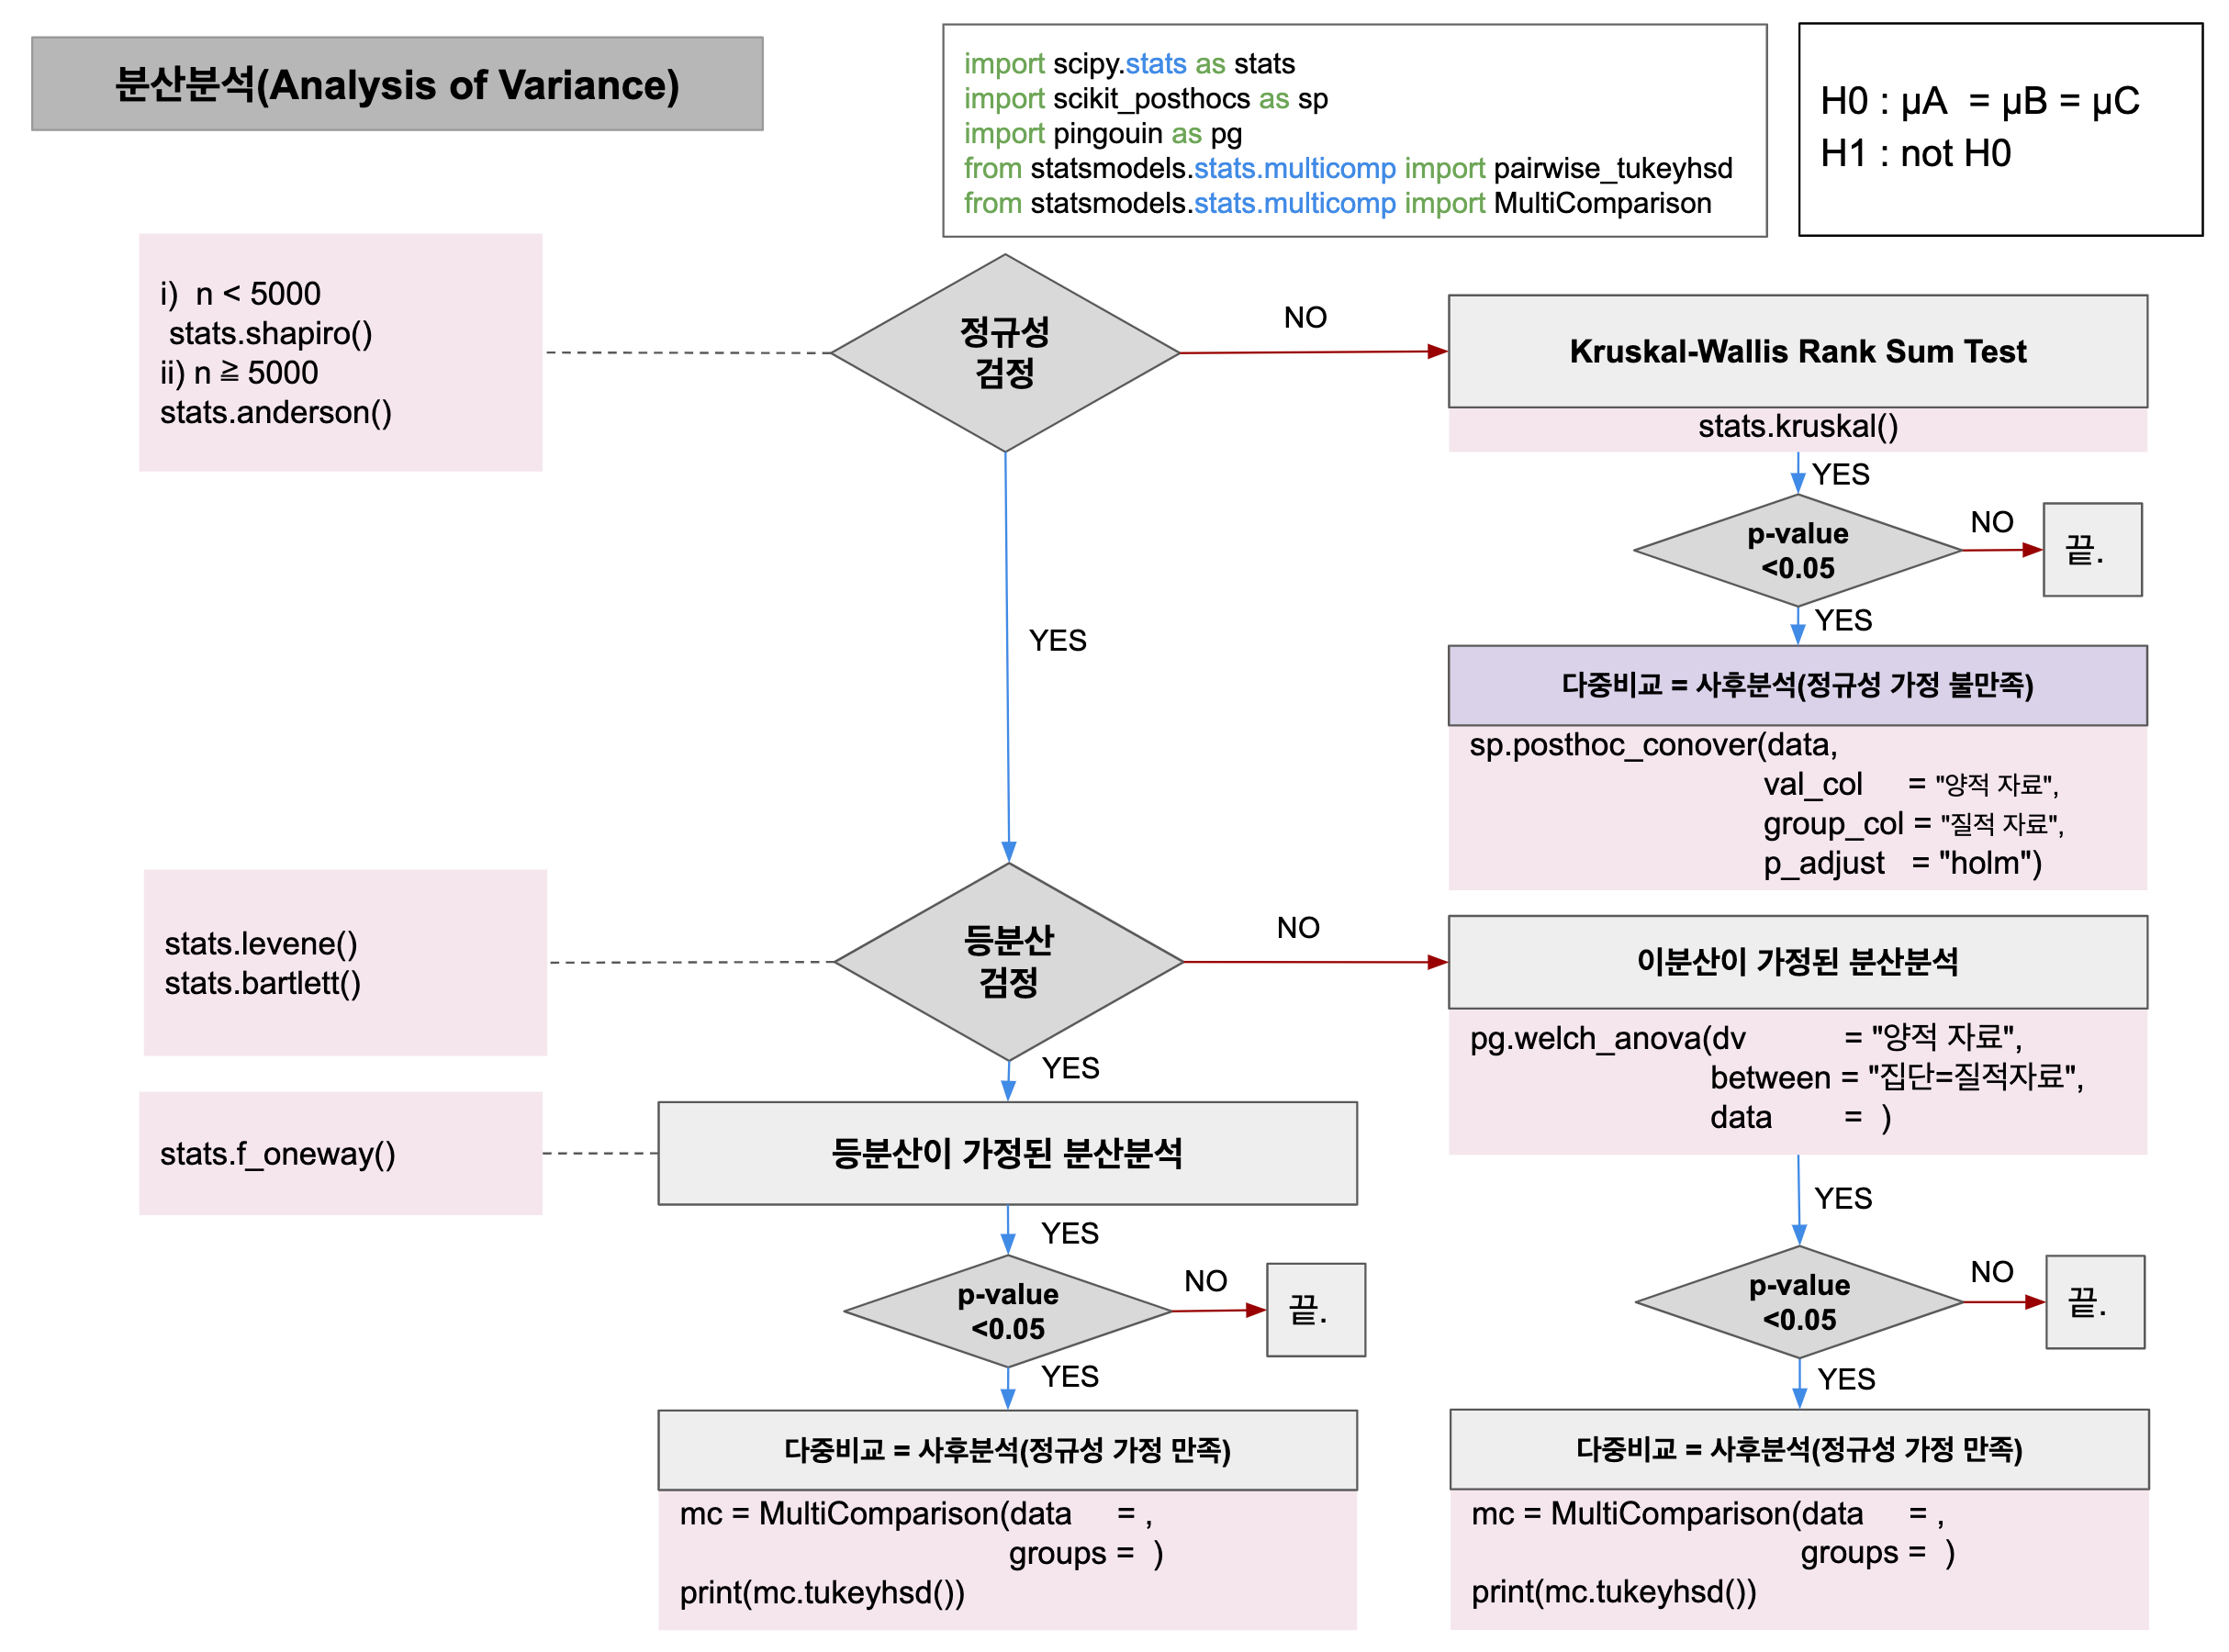

### 2-1. 일원배치 분산분석

1.   실습
- iris 품종(setosa, versicolor, virginica)에 따라 꽃잎 길이(petal_length) 비교
- H0(귀무가설) : iris 품종에 따라 꽃잎 길이 같다
- H1(대립가설) : iris 품종에 따라 꽃잎 길이 다르다
2.   실습 순서
- EDA
- 정규성, 등분산성 확인 / 독립성은 random sampling
- ANOVA 분석
- 사후 분석

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#통계패키지
from scipy import stats
import pingouin as pg
#사이킷런 iris data
from sklearn.datasets import load_iris

# iris data 로딩
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

iris_df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_df['label'] = iris.target
iris_df.head(3)

In [ ]:
iris_df.describe()

In [ ]:
sns.boxplot(x = 'label', y = 'petal length (cm)', data = iris_df) 
plt.show()

In [ ]:

#정규성 검증
print(stats.shapiro(iris_df['petal length (cm)'][iris_df['label']==0]))
print(stats.shapiro(iris_df['petal length (cm)'][iris_df['label']==1]))
print(stats.shapiro(iris_df['petal length (cm)'][iris_df['label']==1]))

# 정규성 충족되지 않았을 때
kruskal = stats.kruskal(
    iris_df['petal length (cm)'][iris_df['label']==0],
    iris_df['petal length (cm)'][iris_df['label']==1],
    iris_df['petal length (cm)'][iris_df['label']==2] )
print(kruskal)
print('------------------------------------------------------------------------')
#등분산성 검증
levene = stats.levene(
    iris_df['petal length (cm)'][iris_df['label']==0],
    iris_df['petal length (cm)'][iris_df['label']==1],
    iris_df['petal length (cm)'][iris_df['label']==2] )
print(levene)

bartlett = stats.bartlett(
    iris_df['petal length (cm)'][iris_df['label']==0],
    iris_df['petal length (cm)'][iris_df['label']==1],
    iris_df['petal length (cm)'][iris_df['label']==2] )
print(bartlett)

# 등분산성 충족되지 않았을 때
aov = pg.welch_anova(dv='petal length (cm)', between='label', data=iris_df) 
# dv : dependent variable (종속변수 = 반응변수) : 양적자료
# between : independent variable (독립변수 = 설명변수) : 질적자료

print(aov)
print('------------------------------------------------------------------------')
# 일원분산분석 실시, group이 독립변수, weight가 종속변수 = group에 따라 weight가 달라지는지 검증
# scipy.stats
f_oneway = stats.f_oneway(
    iris_df['petal length (cm)'][iris_df['label']==0],
    iris_df['petal length (cm)'][iris_df['label']==1],
    iris_df['petal length (cm)'][iris_df['label']==2] )
print(f_oneway)

statsmodel

In [ ]:
# 사후 분석
집단을 3개
1.2.3

1-2
1-3
2-3


from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

comp = MultiComparison(iris_df['petal length (cm)'], iris_df['label'])


# 봉페르니 교정
result = comp.allpairtest(stats.ttest_ind, method='bonf')
print(result[0])
print('------------------------------------------------------------------------')

# 투키의 HSD
mc = MultiComparison(data = iris_df['petal length (cm)'], groups = iris_df['label'])
print(mc.tukeyhsd())

3. 결과 해석
- 정규성   : p-value가 0.05보다 크므로 정규성 만족
- 등분산성 : p-value가 0.05보다 작으므로 정규성 만족X → 이분산
- 이분산성 : welch_anova 사용
 - ddof1 = 자유도 : (k-1) = 2 -> k = 3
 - ddof2 = 자유도 : (n-k) = 17.128419 -> n = 20.128419
 - F = 검정통계량 : 5.180972
 - p-unc = P-value : 0.017393
 - p-value가 0.05보다 작으므로 귀무가설 기각, 대립가설 채택
- AVOVA test : p-value가 0.05보다 작으므로 귀무가설 기각, 대립가설 채택

출처
1. https://velog.io/@pyose95/Data-Analysis
2. https://junsik-hwang.tistory.com/26?category=803034
3. https://mindscale.kr/course/basic-stat-python/22/

### 2-2 다원분산분석

출처

1. https://mindscale.kr/course/basic-stat-python/24/
2. https://partrita.github.io/posts/ANOVA-python/



---



## **3. 카이제곱**
*  질적자료와 질적자료간에 서로 통계적으로 관계가 있는지 판단하는 검정
*   카이제곱 분포를 기반으로 관찰된 빈도와 기대되는 빈도와 의미있게 다른지 여부를 검증한다.






### 3-1. one sample

In [ ]:
from scipy.stats import chisquare
arr = [100, 100, 100, 100, 100, 110]
chi1 = chisquare(arr)
chi1

### 3-2. two sample

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
df.head(10)

In [ ]:
contigency= pd.crosstab(df['Gender'], df['isSmoker']) 
contigency

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
c, p, dof, expected = chi2_contingency(contigency)
# Print the p-value
print(p)

### 3-3. n sample



*   범주형 데이터가 많을 경우



In [ ]:
import pandas as pd
loan = pd.read_csv('loan_data_set.csv')

#Dropping the uninformative feature
loan.drop(['Loan_ID'], axis = 1, inplace = True)

#Transform the numerical feature into categorical feature
loan['Loan_Amount_Term'] = loan['Loan_Amount_Term'].astype('object')
loan['Credit_History'] = loan['Credit_History'].astype('object')

#Dropping all the null value
loan.dropna(inplace = True)

#Getting all the categorical columns except the target
categorical_columns = loan.select_dtypes(exclude = 'number').drop('Loan_Status', axis = 1).columns
loan.info()

In [ ]:
pd.crosstab(loan['Gender'], loan['Loan_Status'])

In [ ]:
# Import the function
from scipy.stats import chi2_contingency

#Testing the relationship
chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

In [ ]:
chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(loan['Loan_Status'], loan[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

In [ ]:
property_dummies = pd.get_dummies(data = loan[['Property_Area', 'Loan_Status']], columns = ['Property_Area'])

In [ ]:
#Example
pd.crosstab(property_dummies['Loan_Status'], property_dummies['Property_Area_Rural'])

In [ ]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(loan[i])
    bon_p_value = 0.05/loan[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(loan['Loan_Status'], dummies[series]))[1] < bon_p_value:
            check['{}-{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}-{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

In [ ]:
#OneHotEncoding all the categorical variable except the target; Also drop_first = True to avoid multicollinearity for Logistic Regression
data_log = pd.get_dummies(data = loan, columns = loan.select_dtypes(exclude = 'number').drop('Loan_Status', axis =1).columns, drop_first =True)
#Change the class into numerical value
data_log['Loan_Status'] = data_log['Loan_Status'].apply(lambda x: 0 if x == 'N' else 1)
#Splitting the data into Training and Test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_log.drop('Loan_Status', axis =1), data_log['Loan_Status'], test_size = 0.30, random_state = 101)
#Creating the prediction model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train, y_train)
#Performance Check
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score
predictions = log_model.predict(X_test)
print(accuracy_score(y_test, predictions))
Out: 0.7708333333333334
print(classification_report(y_test,predictions))

In [ ]:
#Creating the ROC-AUC plot
preds = log_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10,8))
plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#Get the list of all the significant pairwise
significant_chi = []
for i in res_chi_ph[res_chi_ph['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    significant_chi.append('{}_{}'.format(i.split('-')[0],i.split('-')[1]))
#Drop the data with duplicate information
for i in ['Married_No', 'Credit_History_0.0']:
    significant_chi.remove(i)
#Including the numerical data, as I have not analyze any of this feature
for i in loan.select_dtypes('number').columns:
    significant_chi.append(i)
print(significant_chi)
Out: ['Married_Yes', 'Credit_History_1.0','Property_Area_Semiurban',
 'ApplicantIncome','CoapplicantIncome', 'LoanAmount']

In [ ]:
#Training the model only with the significant features and the numerical features
log_model = LogisticRegression(max_iter = 1000)
log_model.fit(X_train[significant_chi], y_train)
#Metrics check
predictions = log_model.predict(X_test[significant_chi])
print(accuracy_score(y_test, predictions))
Out: 0.7847222222222222
print(classification_report(y_test,predictions))

출처

1.
2. https://data-newbie.tistory.com/446
3. https://towardsdatascience.com/categorical-feature-selection-via-chi-square-fc558b09de43


## **4. 상관분석**

*   두 양적 자료 간에 통계적으로 직선의 관계가 있는지 검정하는 방법
*   선형적으로 증가 or 감소 나타냄
*   피어슨(Pearson) 상관 계수
 - 정규성 따르는 경우 사용
 - 연속형 변수의 상관 관계
*   스피어만(Spearman) 상관 계수
 - 비선형! 비모수적 방법!
 - 정규성 아닐 경우
 - 순위형, 순서형 자료일 경우
 - 데이터를 작은 것부터 차례로 순위를 매겨 계산함
 - 자료에 이상치가 있거나 표본 크기 작을 때 유용
*   켄달(Kendall) 상관 계수
 - 비모수적 방법!
 - 두 변수들 간의 순위 비교
 - 정규성 아닐 경우

1.   실습
- 꽃잎 길이(petal_length)와 꽃받침 길이(sepal_length) 상관성 검증
- H0(귀무가설) : 꽃잎 길이와 꽃받침 길이는 상관관계가 있다
- H1(대립가설) : 꽃잎 길이와 꽃받침 길이는 상관관계가 있다
2.   실습 순서
- EDA
- 정규성 확인
- 상관계수 도출






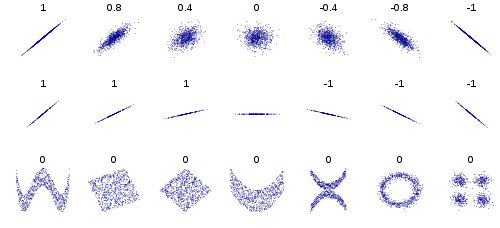

In [ ]:
import seaborn as sns

sns.pairplot(x_vars = 'petal length (cm)', y_vars = 'sepal length (cm)', data = iris_df)
plt.show()

# 산점 행렬도 (SPM : Scatter Plot Matrix)
sns.pairplot(iris_df)
plt.show()

In [ ]:
# 정규성 검증
print(stats.shapiro(iris_df['petal length (cm)']))
print(stats.shapiro(iris_df['sepal length (cm)']))

#피어슨 상관관계
pearson = stats.pearsonr(iris_df['petal length (cm)'], iris_df['sepal length (cm)'])
print(pearson)

#스피어만 상관관계
spearman = stats.spearmanr(iris_df['petal length (cm)'], iris_df['sepal length (cm)'])
print(spearman)

#켄달 상관관계
kendall = stats.kendalltau(iris_df['petal length (cm)'], iris_df['sepal length (cm)'])
print(kendall)

3. 결과해석

*   정규성 : p-value가 0.05보다 작으므로 정규성 X
*   스피어만 상관계수 : 0.88 / p-value : 0



출처
1. https://velog.io/@pyose95/Data-Analysis-14.-%EC%83%81%EA%B4%80%EB%B6%84%EC%84%9D-Correlation-Analysis



---



## **5. 회귀분석(통계분석)**

 


In [ ]:
#파일 직접 업로드하기
from google.colab import files
myfile = files.upload()

In [ ]:
df = pd.read_csv('cars.csv')
df.head()

In [ ]:
import seaborn as sns

sns.regplot('speed', 'dist', lowess=True, data = df)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter('speed', 'dist', data = df)

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('Speed')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax2.set_title('Distance')

In [ ]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('Speed')

# dist의 밀도 플롯
sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('Distance')

In [ ]:
import scipy.stats

print(scipy.stats.skew(df['speed']))
print(scipy.stats.skew(df['dist']))

In [ ]:
# 단순 선형 회귀 분석
from statsmodels.formula.api import ols

res = ols('dist ~ speed', data=df).fit()
res.summary()

결과 분석



In [ ]:
print(res.params.Intercept) ## 절편
print(res.params.speed) ## 기울기

y = 3.9324087591240877x - 17.57909489051096

In [ ]:
# sp
res.predict(exog = dict(speed=[40]))

In [ ]:
from sklearn.linear_model import LinearRegression

## sklearn linear regression 사용
x = df['speed'].values.reshape(-1,1) ## 차원 증가 시켜준다.
y = df['dist']
 
fit = LinearRegression().fit(x,y) ## 단순선형회귀모형 적합

## 회귀 계수
print(fit.intercept_) ## 절편
print(fit.coef_) ## 기울기

## 추정값
print(fit.predict([[40]]))

In [ ]:
# 단순 선형 회귀 분석 / 절편 제거
from statsmodels.formula.api import ols

res1 = ols('dist ~ 0 + speed', data=df).fit()
#res1 = ols('dist ~ speed - 1', data=df).fit()

res1.summary()

In [ ]:
# 예측값(fittd) - 잔차(residual) 그래프

fitted = res.predict(df)
residual = df['dist'] - fitted
sns.regplot(fitted, residual, lowess=True, line_kws={'color': 'red'})
plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

In [ ]:
# 잔차의 정규성 Q-Q plot

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

#sns.scatterplot(x, y)
#plt.plot([-3, 3], [-3, 3], '--', color='grey')

# 잔차 정규성 확인
print(scipy.stats.shapiro(sr))

sns.distplot(residual)

In [ ]:
# 잔차의 등분산성

sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

In [ ]:
# 극단값

from statsmodels.stats.outliers_influence import OLSInfluence

cd, _ = OLSInfluence(res).cooks_distance
cd.sort_values(ascending=False).head()

출처

1. https://mindscale.kr/course/basic-stat-python/10/
2. https://zephyrus1111.tistory.com/52


### 5-1. 이상치 제거

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/gdrive/')
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/data/')

card_df = pd.read_csv('./creditcard.csv')
card_df.head(3)

In [ ]:
card_df.describe(percentiles=[.99, .01])

In [ ]:
plt.boxplot(card_df['V14'])
plt.show()

In [ ]:
# 파이썬 머신러닝 4.9

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    print(len(outlier_index))
    return outlier_index

outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
card_df.drop(outlier_index, axis=0, inplace=True)
print(card_df.shape)



def get_outlier2(data, col_name):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    quantile_25, quantile_75 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(len(outlier_index))
    data.drop(outlier_index, axis=0, inplace=True)
    print(data.shape)

    return outlier_index

get_outlier(card_df,'V14')


### 5-2. 데이터 표준화

1. Standardscaler
2. min-max 스케일링
2. log1p 변환

In [ ]:
#파이썬 머신러닝 완벽 가이드 5.6

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data



---



# 6. 기타

## 6-1. Run test

*   비모수 통계 기법

https://www.statology.org/runs-test-python/

## *6*-2. 관리도

*   공정 품질관리


https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051